In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def fn(x, d, s, w):
    num = np.exp(-d/(2*s**2)*(x-1)**2)
    den = (1 + np.exp(-d*2*x/(s**2)))**w
    
    return num/den

/tmp/ipykernel_1098571/3933876022.py:8: RuntimeWarning: overflow encountered in power
  den = (1 + np.exp(-d*2*x/(s**2)))**w
/tmp/ipykernel_1098571/3933876022.py:8: RuntimeWarning: overflow encountered in exp
  den = (1 + np.exp(-d*2*x/(s**2)))**w


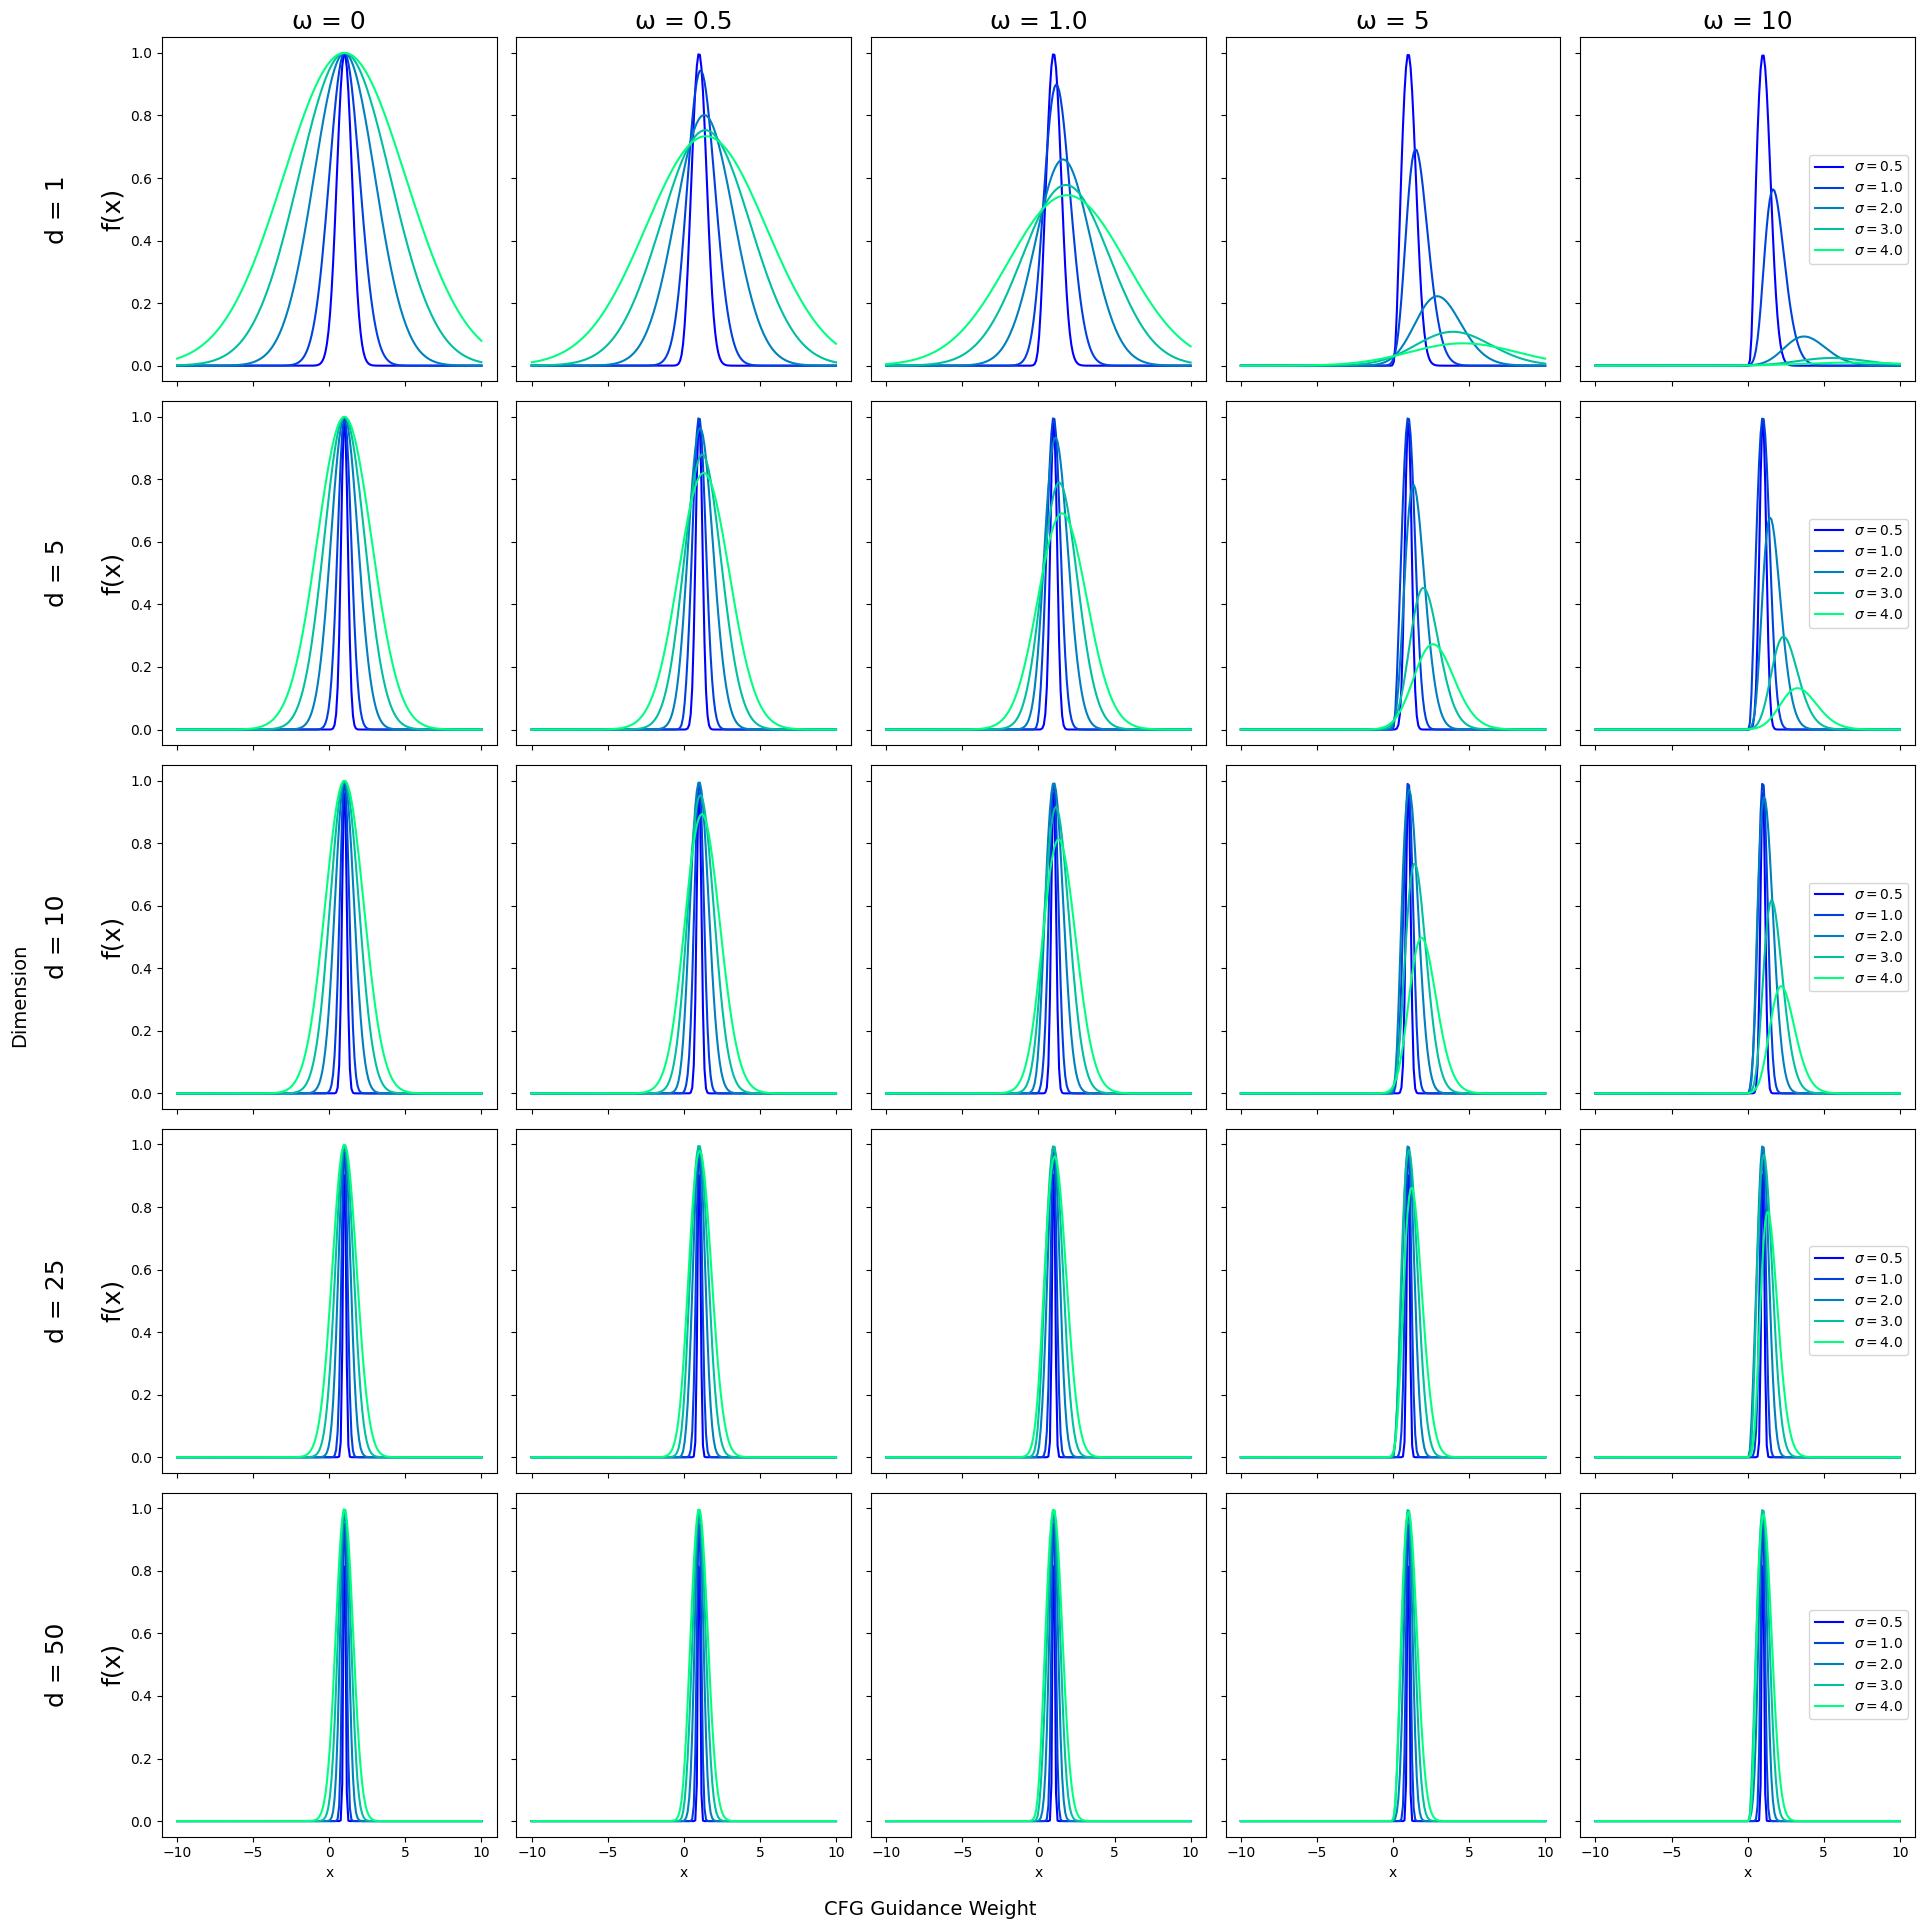

In [2]:
x = np.linspace(-10, 10, 200)
s_values = [0.5, 1., 2., 3., 4.]
w_values = [0, 0.5, 1., 5, 10]
d_values = [1, 5, 10, 25, 50]
colors = cm.winter(np.linspace(0, 1, len(s_values)))
fig, axes = plt.subplots(len(d_values), len(w_values), figsize=(20, 20), sharex=True, sharey=True)
for i, d in enumerate(d_values):
    for j, w in enumerate(w_values):
        ax = axes[i, j]
        for s, color in zip(s_values, colors):
            ax.plot(x, fn(x, d, s, w), label=f'$\sigma = {s}$', color=color)
        if i == 0:
            ax.set_title(f'ω = {w}', fontsize=18)
        if j == 0:
            ax.set_ylabel(f'd = {d}\n\nf(x)', fontsize=18)
        if i == len(d_values) - 1:
            ax.set_xlabel('x', fontsize=10)
    ax.legend(ax.lines, [line.get_label() for line in ax.lines], loc='center right', fontsize=10)

fig.text(0.5, 0.04, 'CFG Guidance Weight', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Dimension', va='center', rotation='vertical', fontsize=14)
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show()

In [45]:
# fig.savefig('figure.png', dpi=300, bbox_inches='tight')


/tmp/ipykernel_1774227/3933876022.py:8: RuntimeWarning: overflow encountered in power
  den = (1 + np.exp(-d*2*x/(s**2)))**w


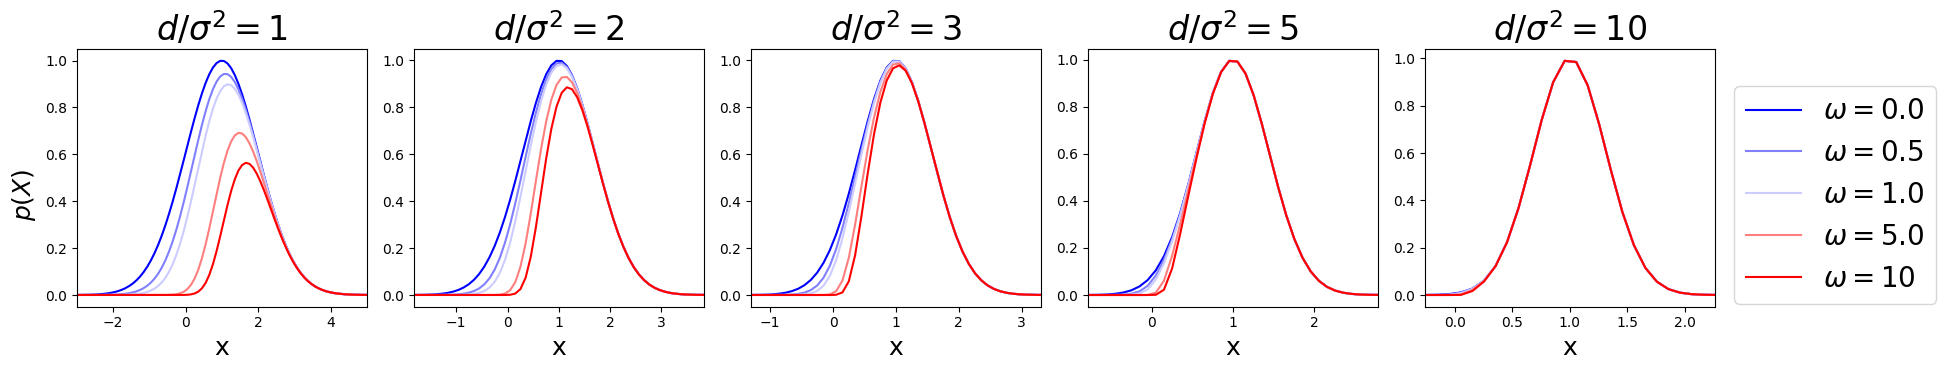

In [12]:
c = 4.

x = np.linspace(-10, 10, 200)

sigma = 1.
# ratio = [0.1, 0.5, 1., 2., 5., 10.]
d_values = [1, 2,3,5,10]
w_values = [0., 0.5, 1., 5., 10]
colors = cm.bwr(np.array([0.  , 0.25, 0.4 , 0.75, 1.  ]))

fig, axes = plt.subplots(1, len(w_values), figsize=(20, 4))
for j, d in enumerate(d_values):
    ax = axes[j]
    ax.set_xlim([1-c*sigma/np.sqrt(d), 1+c*sigma/np.sqrt(d)])
    for w, color in zip(w_values, colors):
        ax.plot(x, fn(x, d, sigma, w), label=f'$\omega = {w}$', color=color)
    ax.set_title(f'$d/\sigma^2={d}$', fontsize=24)
    ax.set_xlabel('x', fontsize=18)
    
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.01, 0.5), fontsize=20)
fig.text(0.04, 0.5, f'$p(X)$', va='center', rotation='vertical', fontsize=18)

# fig.text(0.04, 0.5, 'Dimension', va='center', rotation='vertical', fontsize=14)

# plt.suptitle(f'Effect of CFG Guidance Weight', fontsize=30)
plt.tight_layout(rect=[0.05, 0.05, 0.9, 1])
fig.savefig('new_figs/2_prelim.pdf', dpi=300, bbox_inches='tight')
plt.show()